## A Quick Sage Tutorial on Graphs and Groups: Part 1

Doğukan E. Türköz

### 0. Intro

This tutorial is made up of two parts (click for [Part 2](https://dodoturkoz.github.io/URSS/part2.html)). This part of the tutorial assumes very little mathematics knowledge and some basic understanding of Python. If you want to follow along and be able to edit the code cells, you should [download](https://dodoturkoz.github.io/URSS/part1.ipynb) this notebook and pick a way to run Sage. One could either download Sage's [packages](https://www.sagemath.org/download.html) (you also need Jupyter if you don't have it already installed) or use the [Sage Cell Server](https://sagecell.sagemath.org/) to run Sage code online. A warning to the online users: Note that some the examples depend on constants which were defined in previous cells, so you will need to define relevant constants as you go along. Similarly, if you are following along the Jupyter Notebook you will need to run all the cells for certain cells to work and if this is your first time running Sage, some functions may take longer than usual to run. 






Sage has a very detailed [documentation](https://doc.sagemath.org/html/en/reference/graphs/index.html) on graph theory, which might seem daunting at a first look, but it has lots of examples. If you are unsure about a certain function you have two options. Either search through the documentation or do some inspired guesswork. If you press tab after writing a few letters, a dropdown list will appear with some suggestions. Another nice trick is that if you put a question mark after a function, the relevant section of the documentation will be opened.

In [58]:
graphs.CompleteGraph?

### 1. Graphs

In this section, I will prioritize examples over formality. Let's borrow Wikipedia's definition of graph theory and a graph.

"In mathematics, graph theory is the study of graphs, which are mathematical structures used to model pairwise relations between objects. A graph in this context is made up of vertices (also called nodes or points) which are connected by edges (also called links or lines)."

Our first example will be the complete graph on $n$ vertices, denoted $K_n$. Let's plot this graph for $n=5$.

In [61]:
K5 = graphs.CompleteGraph(5)

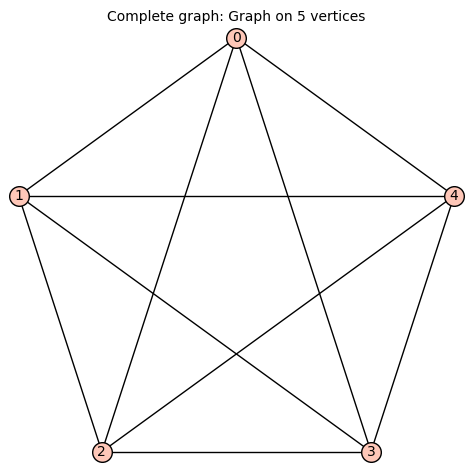

In [62]:
K5

**Exercise**: Change CompleteGraph to other types of well-known graph families. (For example, try PathGraph and CycleGraph). 

Try to guess what the what the following functions are doing.

In [59]:
K5.order()

5

In [60]:
K5.size()

10

**Exercise** : Find an expression for the number of edges of $K_n$ for arbitrary $n$.

The **degree** of a vertex is the number of vertices adjacent to it. This is the same the number of edges incident to this vertex. Let's see an example by computing the degree of vertex 1 in the following graph.

In [77]:
B = graphs.BullGraph()

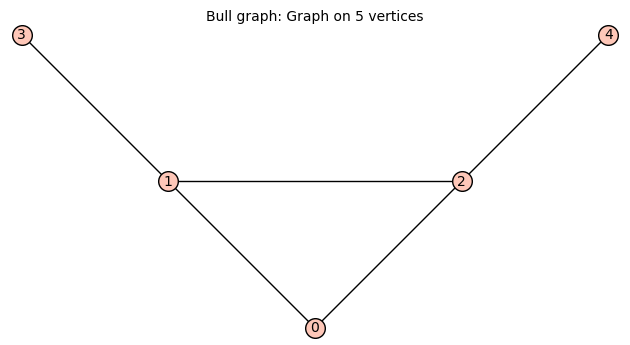

In [79]:
B

In [80]:
B.degree(1)

3

A graph where all vertices have the same degree is called a **regular** graph. Now, let's list the vertex degrees of a graph from the greatest to the lowest. Such a sequence is called the **degree sequence** of a graph. 

In [78]:
B.degree_sequence()

[3, 3, 2, 1, 1]

**Exercise**: Notice that if you sum up the numbers in the degree list of $B$, the number you obtain is exactly twice the number of edges of $B$. Can you explain why this happened? Can you generalise this?

The next example is important, as we will keep coming back to it for the remaining of this section. To understand this example you will need to know the basics about binary numbers (don't worry, they're very simple). See [this link](https://www.mathsisfun.com/binary-number-system.html) to learn the basics about binary.


Now, we can define the hypercube graph $Q_n$ as follows: The vertex set of $Q_n$ is all $n$-digit binary numbers, and two vertices are adjacent if their binary representations differ in a single digit. $Q_n$ is known as the *hypercube graph* (which essentially means the $n$-dimensional version of a cube). Let's test this fact out. If we let $n=3$, we should get the graph corresponding to a 3D cube. 

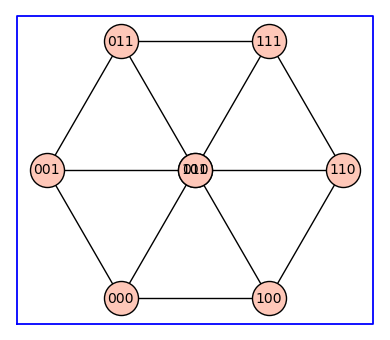

In [88]:
Q3 = graphs.CubeGraph(3)
P = Q3.graphplot(graph_border=True, vertex_size = 600)
P.show()

Hang on, a 3D cube has 8 vertices, right? Notice that something is off about the labeling of the middle vertex.

In [89]:
Q3.order()

8

Sage is indeed correct. The reason why it seems like there are only 7 vertices in the graph is due to the way the graph is projected. Note that two vertices coincide on the middle of the plot. To fix this issue, we need change the *layout* of the graph.

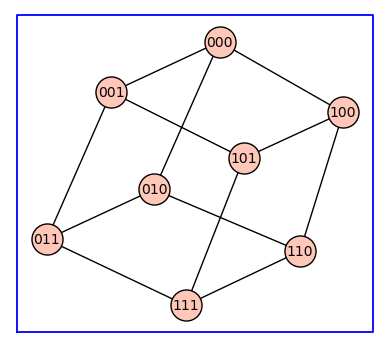

In [135]:
Q3 = graphs.CubeGraph(3)
Q3P = Q3.graphplot(graph_border=True, layout = "spring", vertex_size=500)
Q3P.show()
# Note if you run the code again, you will get a slighly different visual effect.

Now, that's better, but can we make it even better?

In [ ]:
Q3.plot3d()

**Exercise**: Edit the code above and plot $Q_n$ for small values of $n$. Using relevant function, make a conjecture for the number of vertices and the number of edges (harder) of $Q_n$ for arbitrary $n$. 

**Exercise**: Change the layout to "circular" and guess what this layout does in general.

Let's plot $Q_n$ for small values of $n$.

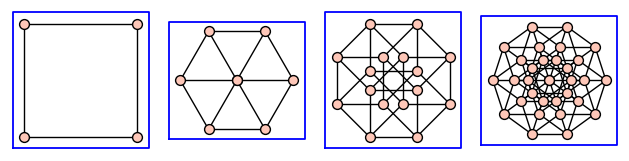

In [116]:
qn_list = []
for i in range(2,6):
    qn_list .append(graphs.CubeGraph(i))
    
graphs_list.show_graphs(qn_list)

Let's also plot $Q_8$ on its own to obtain a nice picture.

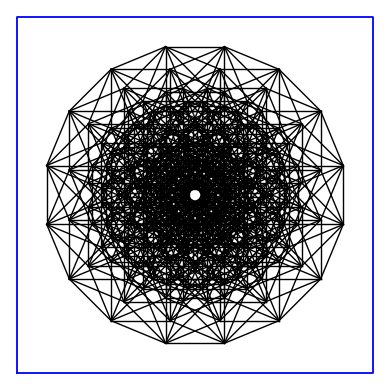

In [125]:
Q8 = graphs.CubeGraph(8)
Q8P = C.graphplot(vertex_labels=False, vertex_size=0,graph_border=True)
Q8P.show()

### Chromatic Number

The chromatic number of a graph $G$ is the smallest amount of colors to color the vertices of $G$ so that adjacent vertices of $G$ have different colors.

We can access $Q_4$ from the list we created above. 

In [117]:
Q4 = qn_list[2]

We first construct a coloring and save it in a dictionary with RGB Hex labeling.

In [137]:
Q4_colors = Q4.coloring(hex_colors=True)

Then, we simply set the vertex_colors to our dictionary.

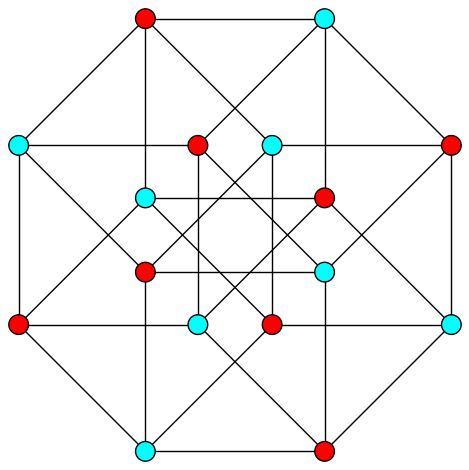

In [123]:
Q4.plot(vertex_colors=Q4_colors, vertex_labels=False)

Now, let's do the same for $Q_8$ for a more interesting plot.

In [126]:
Q8_colors = Q8.coloring(hex_colors=True)

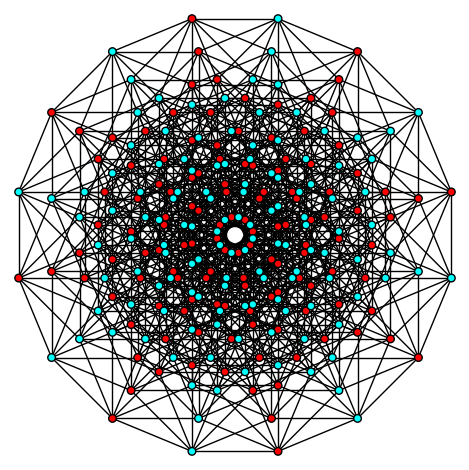

In [131]:
Q8.plot(vertex_colors=Q8_colors, vertex_labels=False, vertex_size = 30)

**Exercise**: Find the chromatic numbers of $K_n, P_n,$ and $C_n$ in terms of $n$.

**Exercise**: Show that the chromatic number of $Q_n$ is $2$ for all $n$. (Hint: Consider the sums of the digits of the vertices) 

If you are into puzzles, the next exercise might come as a nice suprise. 

**Exercise**: Think about how you would solve a standard Sudoku puzzle using graph theory and Sage.

Let's end by noting that graph colorings can be used to solve many scheduling and timetabling problems. There is a comprehensive [textbook](https://link.springer.com/book/10.1007/978-3-030-81054-2) called *Guide to Graph Colouring* by R. Lewis on applications of graph colourings and the author also has a [short video](https://youtu.be/y4RAYQjKb5Y?si=RzJ8nbOgwFATkH-d) on some of these applications.

Continue to [Part 2](https://dodoturkoz.github.io/URSS/part2.html) of this tutorial.